In [1]:
#importing basic libraries
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Nutrition= pd.read_excel('/content/Nutrition data.xlsx')
Nutrition.head(2)

,Height (feet),Weight (kg),BMI,Result,Energy,Protein,Fat,Carbohydrate,Result.1
0,5.7,80,26.5,Overweight,3100,68,49,140,< RDA
1,5.7,85,28.2,Overweight,3500,57,45,135,RDA met


In [3]:
Nutrition.columns

Index(['Height (feet)', 'Weight (kg)', 'BMI', 'Result', 'Energy', 'Protein',
       'Fat', 'Carbohydrate', 'Result.1'],
      dtype='object')

In [4]:
Nutrition.shape

(100, 9)

In [5]:
Nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Height (feet)  100 non-null    float64
 1   Weight (kg)    100 non-null    int64  
 2   BMI            100 non-null    float64
 3   Result         100 non-null    object 
 4   Energy         100 non-null    int64  
 5   Protein        100 non-null    int64  
 6   Fat            100 non-null    int64  
 7   Carbohydrate   100 non-null    int64  
 8   Result.1       100 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 7.2+ KB


## Correlation

In [6]:
#correlation
Nutrition.corr()

,Height (feet),Weight (kg),BMI,Energy,Protein,Fat,Carbohydrate
Height (feet),1.000000,0.447534,-0.155371,-0.090990,0.116134,0.016559,0.076324
Weight (kg),0.447534,1.000000,0.810676,-0.131567,0.026264,0.038414,0.031475
BMI,-0.155371,0.810676,1.000000,-0.074083,-0.025481,0.047438,-0.002533
Energy,-0.090990,-0.131567,-0.074083,1.000000,0.602356,0.621753,0.533331
Protein,0.116134,0.026264,-0.025481,0.602356,1.000000,0.800517,0.807939
Fat,0.016559,0.038414,0.047438,0.621753,0.800517,1.000000,0.702834
Carbohydrate,0.076324,0.031475,-0.002533,0.533331,0.807939,0.702834,1.000000


In [7]:
nutrition1=Nutrition[['Height (feet)',	'Weight (kg)']]
nutrition1.corr()


,Height (feet),Weight (kg)
Height (feet),1.000000,0.447534
Weight (kg),0.447534,1.000000


In [8]:
nutrition2=Nutrition[['Weight (kg)'	,'BMI']]
nutrition2.corr()

,Weight (kg),BMI
Weight (kg),1.000000,0.810676
BMI,0.810676,1.000000


In [9]:
nutrition2=Nutrition[['Energy',	'Protein']]
nutrition2.corr()

,Energy,Protein
Energy,1.000000,0.602356
Protein,0.602356,1.000000


In [10]:
nutrition3=Nutrition[['Energy',	'Fat']]
nutrition3.corr()

,Energy,Fat
Energy,1.000000,0.621753
Fat,0.621753,1.000000


In [11]:
nutrition4=Nutrition[['Protein',	'Fat']]
nutrition4.corr()

,Protein,Fat
Protein,1.000000,0.800517
Fat,0.800517,1.000000


In [12]:
nutrition5=Nutrition[['Protein',	'Carbohydrate']]
nutrition5.corr()

,Protein,Carbohydrate
Protein,1.000000,0.807939
Carbohydrate,0.807939,1.000000


In [13]:
nutrition6=Nutrition[['Fat',	'Carbohydrate']]
nutrition6.corr()

,Fat,Carbohydrate
Fat,1.000000,0.702834
Carbohydrate,0.702834,1.000000


In [14]:
nutrition7=Nutrition[['Energy',	'Carbohydrate']]
nutrition7.corr()

,Energy,Carbohydrate
Energy,1.000000,0.533331
Carbohydrate,0.533331,1.000000


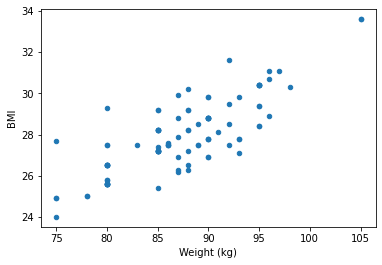

In [15]:
Nutrition.plot.scatter(x='Weight (kg)', y='BMI')

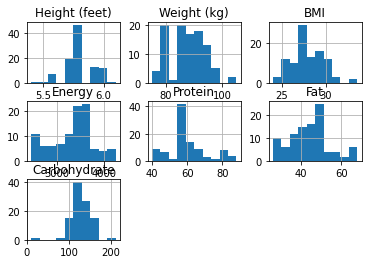

In [16]:
Nutrition.hist()
plt.show()

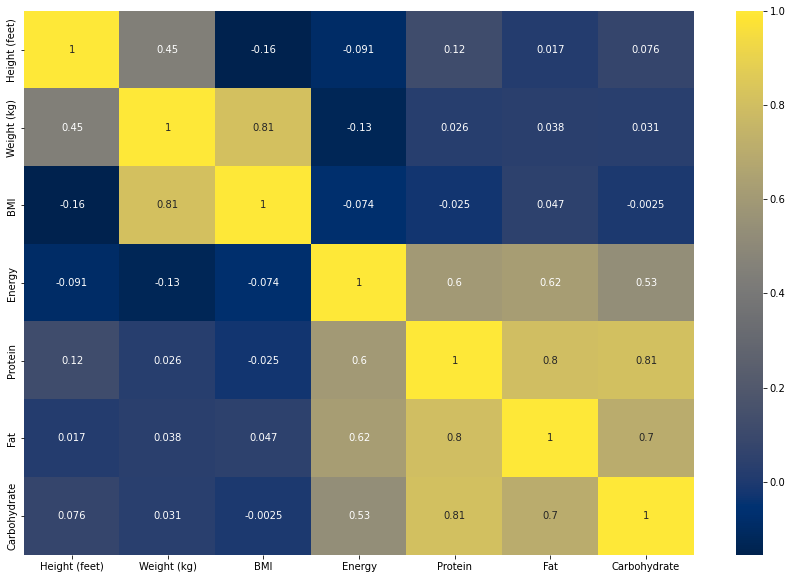

In [17]:
plt.figure(figsize=(15,10))
cor = Nutrition.corr()
sns.heatmap(cor,annot=True, cmap='cividis') 

## Chi Square

In [18]:
import  scipy.stats as stats
from scipy.stats import chi2

In [19]:
ctab1=pd.crosstab(Nutrition['Result'],Nutrition['Result.1']) 
ctab1

Result.1,< RDA,> RDA,RDA met
Result,,,
Normal,0,0,2
Obese,0,0,1
Obese Class I,6,2,3
Obese Class II,0,0,1
Overweight,34,7,44


Text(0.5, 1.0, 'Result')

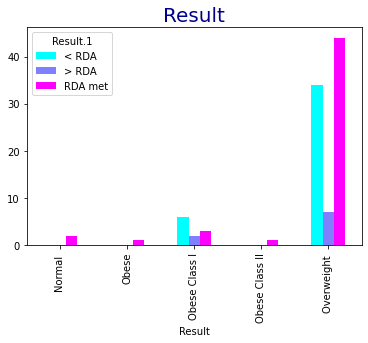

In [20]:
ctab1.plot(kind='bar', cmap ='cool')
plt.title('Result', fontdict= {'fontsize':20, 'fontweight':5, 'color':'darkblue'})

In [21]:
alpha=0.05
values=stats.chi2_contingency(ctab1)
values

(6.734612561602182, 0.565517893824162, 8, array([[ 0.8 ,  0.18,  1.02],
        [ 0.4 ,  0.09,  0.51],
        [ 4.4 ,  0.99,  5.61],
        [ 0.4 ,  0.09,  0.51],
        [34.  ,  7.65, 43.35]]))

In [22]:
p_value1=values[1]
p_value1

0.565517893824162

In [23]:
if p_value1 <= alpha:
   print("Reject H0")
else:
  print("Accept H0")

Accept H0


##conclusion

This is a data of body builders.

*    weight and BMI are positively correlated. As weight increases for each body builders there is a chance for they being obese.  

*    protein and energy are moderate positive correlated, in this data as they are not taking high protein cotent food so that they are gaining moderate energy.

*    fat and energy are moderately positive correlated, in this data as they are not taking high fat content food so that they are gaining moderate energy.

*    in this data we can see, the here the body builders are taking fat content and protein content foods in a moderate level.to maintain their body building.

*    protein and fat is highly correlated, which means most of the protein content foods have fat ...its accrding to the food type

*    Protein and carbohydrates are highly correlated, beacause obviously in protein foods their is carbohydrates..protein foods are of 2 kind one is pulses and other is Non Veg. in pulses their is not fat but carbohydrate is high.
in Non veg fat is high.

*    fat and carbohydrates are moderately correlated, 

*    Energy and carbohydrates ate moderately correlated. as we take more carbohydrates their is no chance of getting energy. in this data bodybuiders are tking not much carbohydrates and they are not gainig energy from carbohydrate foods.

*   in this data the body buliders are not taking much fat foods. insted of that they take protein powders and weight gainers. in this data to gain energy body builders are mostly taking carbohydrates.

the food items with more protein and fat is having carbohydrates.its vary accoding to the food items we take.








